In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
%matplotlib inline
import os

In [27]:
#座標が入ったフォルダを指定
filelist=sorted(os.listdir('../labelsv2/'))

In [28]:
#ファイル結合
for file in filelist:
    tmpdf=pd.read_csv('../labelsv2/'+file,header=None,sep="\s")
    tmpdf["frameno"]=int(file.split("_")[1].split(".")[0])
    
    if int(file.split("_")[1].split(".")[0])==1:
        position=np.array(tmpdf)
    else:
        position=np.vstack([position, np.array(tmpdf)])

/Users/rmizuta/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
position=pd.DataFrame(position)

In [30]:
ball_position=position[position[0]==32].sort_values(by=5)

In [31]:
person_position=position[position[0]==0].sort_values(by=5)

(-1.2, -0.4)

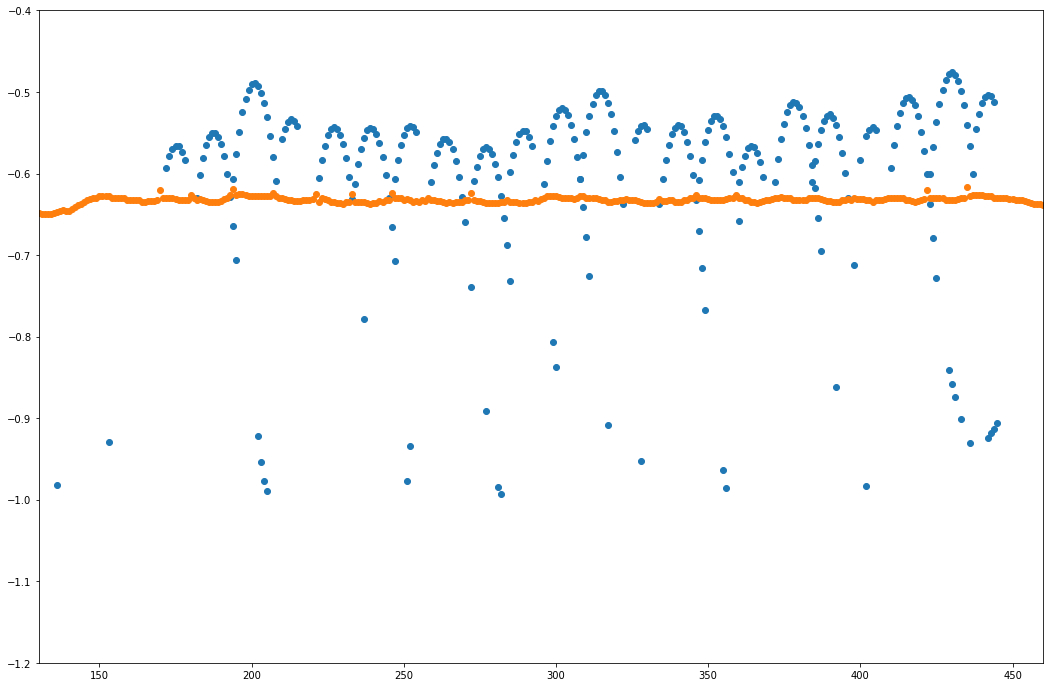

In [32]:
plt.figure(figsize=(18,12))
plt.scatter(ball_position[5],-ball_position[2])
plt.scatter(person_position[5],-person_position[2]+(person_position[4]/2))
plt.xlim(130,460)
plt.ylim(-1.2,-0.4)

In [34]:
#重複削除(高い方を残す)
ball_position=ball_position.sort_values(by=[5,2]).drop_duplicates(subset=[5],keep="first")

In [35]:
#カウントロジック作成
bf_y=100
upflag=[]
for t,y in zip(ball_position[5].values,ball_position[2].values):
    if y<bf_y:
        upflag.append(1)
    else:
        upflag.append(0)
    bf_y=y    

In [36]:
countflag=[0,0,0]
for i in range(ball_position.shape[0]-3):
    if (upflag[i]==1) & (upflag[i+1]==1) & (upflag[i+2]==0) & (upflag[i+3]==0):
        countflag.append(1)
    else:
        countflag.append(0)

In [38]:
ball_position["countflag"]=countflag

(-0.9, -0.4)

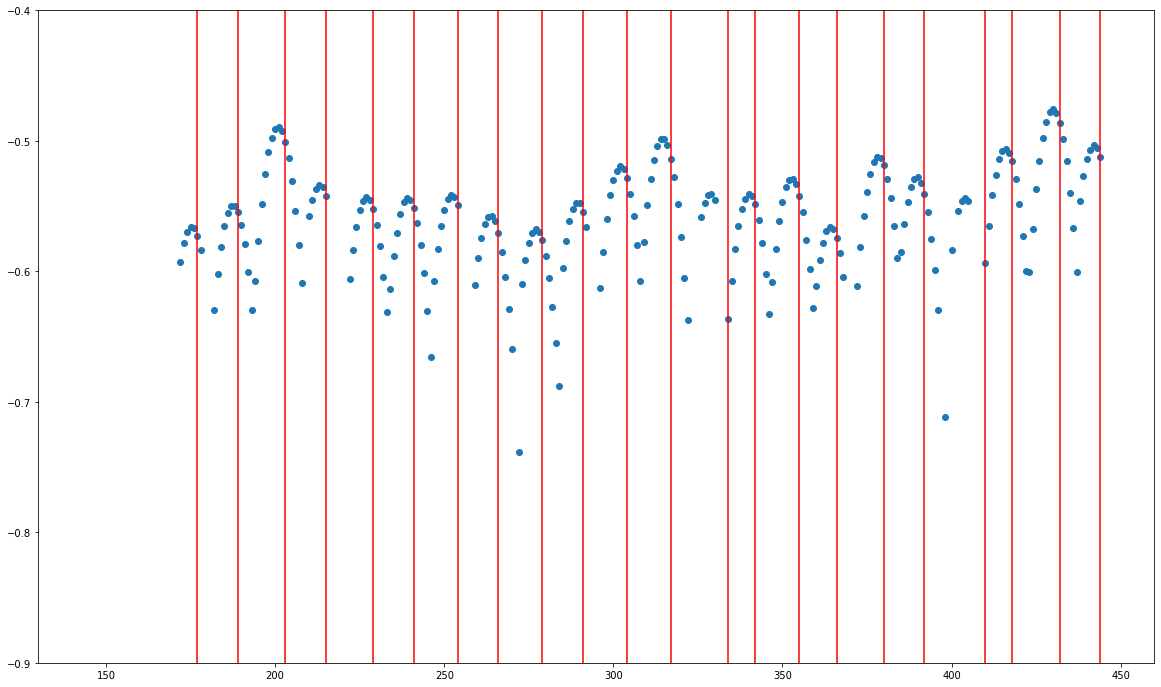

In [40]:
plt.figure(figsize=(20,12))
plt.scatter(ball_position[5],-ball_position[2])
for x in ball_position[ball_position["countflag"]==1][5].values:
    plt.axvline(x=x,c="red")
plt.xlim(130,460)
plt.ylim(-0.9,-0.4)

In [ ]:
#動画→フレーム
#!ffmpeg -i test2v2.mp4 -vcodec png pngv2/image_%04d.png

In [129]:
#各フレームにカウント表示付与
import cv2

count=0
for file in sorted(os.listdir("../pngv2/")):
    framenum=int(file.split("_")[1].split(".")[0])
    if framenum in countflaglist:
        count+=1
    img=cv2.imread("../pngv2/"+file)
    cv2.putText(img, f'count:{count}', (20,1200), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255,255,255), 2, cv2.LINE_AA)
    cv2.imwrite("../png_outv2/"+file, img)

In [ ]:
#フレーム→動画
#!ffmpeg -r 30 -i image_%04d.png -vcodec libx264 -pix_fmt test2v2_count.mp4